#  EDUNET FOUNDATION - Classroom Exercise Notebook

## Lab-1 Implementing K-NN Algorithm using Python

In Telecommunication dataset, with predefined labels, we need to build a model which is used to predict the class of a new or unknown case.

### Import Libraries

In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Loading Data

In [42]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization & Analysis

In [43]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

## 
281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

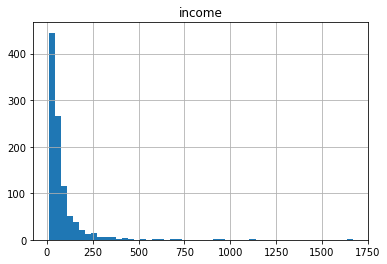

In [44]:
df.hist(column='income', bins=50)

## Feature set X

In [64]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [88]:
X = df[['region', 'tenure','age', 'address', 'income', 'ed', 'employ','retire']] .values  #.astype(float)
X[0:5]
# , 'marital', 'gender', 'reside'

array([[  2.,  13.,  44.,   9.,  64.,   4.,   5.,   0.],
       [  3.,  11.,  33.,   7., 136.,   5.,   5.,   0.],
       [  3.,  68.,  52.,  24., 116.,   1.,  29.,   0.],
       [  2.,  33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [  2.,  23.,  30.,   9.,  30.,   1.,   2.,   0.]])

## Labels

In [89]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data
Data Standardization (Z-Score Standardization) give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [90]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456, -0.25303431, -0.12650641,
         1.0877526 , -0.5941226 , -0.22207644],
       [ 1.19883553, -1.14880563, -0.69181243, -0.4514148 ,  0.54644972,
         1.9062271 , -0.5941226 , -0.22207644],
       [ 1.19883553,  1.52109247,  0.82182601,  1.23481934,  0.35951747,
        -1.36767088,  1.78752803, -0.22207644],
       [-0.02696767, -0.11831864, -0.69181243,  0.04453642, -0.41625141,
        -0.54919639, -1.09029981, -0.22207644],
       [-0.02696767, -0.58672182, -0.93080797, -0.25303431, -0.44429125,
        -1.36767088, -0.89182893, -0.22207644]])

## Test-Train Split

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


## Classification : K nearest neighbor (KNN)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

## Training

In [93]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

## Predict

In [94]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 3, 1, 4, 2], dtype=int64)

## Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [95]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.56
Test set Accuracy:  0.335


## Calculate the accuracy of KNN for different Ks.

In [102]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.345, 0.35 , 0.36 , 0.335, 0.4  , 0.365, 0.395, 0.365, 0.39 ])

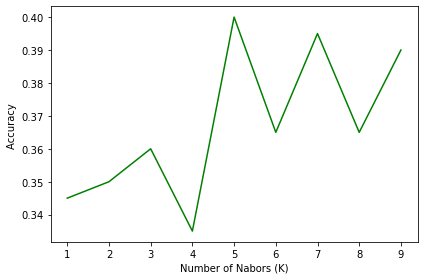

In [103]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [104]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.4 with k= 5
